In [2]:
import numpy as np
# Import the Neuropixels Cache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [3]:
# a list with all the VISp sessions 
session_visp_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'VISp' in structure_list:
        session_visp_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_visp_list))+' sessions that meet this criteria:')
print(session_visp_list)

There are 56 sessions that meet this criteria:
[715093703, 719161530, 721123822, 732592105, 737581020, 739448407, 742951821, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 758798717, 759883607, 760345702, 760693773, 761418226, 762120172, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 821695405, 829720705, 831882777, 835479236, 839068429, 839557629, 840012044, 847657808]


In [4]:
session = cache.get_session_data(session_visp_list[0])

In [5]:
session.get_stimulus_table(['flashes'])

,color,contrast,orientation,phase,pos,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,
3647,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1274.523973,1,flashes,1274.774189,0.250216,244
3648,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1276.525623,1,flashes,1276.775842,0.250219,244
3649,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1278.527343,1,flashes,1278.777552,0.250209,245
3650,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1280.529013,1,flashes,1280.779222,0.250209,244
3651,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1282.530723,1,flashes,1282.780924,0.250201,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1564.766513,1,flashes,1565.016712,0.250199,245
3793,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1566.768143,1,flashes,1567.018352,0.250209,244
3794,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1568.769833,1,flashes,1569.020042,0.250209,244


In [6]:
presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

/opt/conda/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950930145 ... 950933960

In [7]:
#peristimulus time histograms of VISp
import matplotlib.pyplot as plt
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()

<Figure size 800x800 with 1 Axes>

In [8]:
#we chose a set of units in VISpm, then created a DataArray containing binned spikes aligned to the start of each stimulus.
import xarray as xr
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISp')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da = optotagging_spike_counts(bin_edges, trials, units)

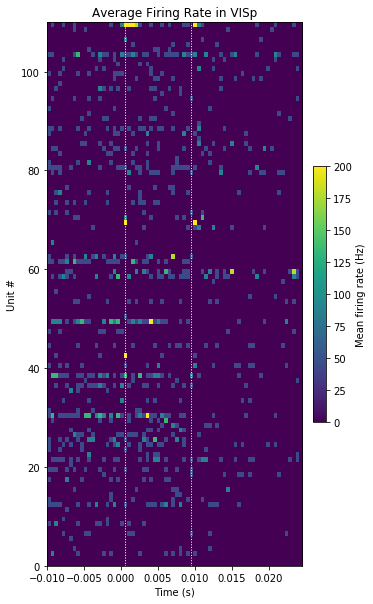

In [9]:
import matplotlib.pyplot as plt
def plot_optotagging_response(da):

    plt.figure(figsize=(5,10))

    plt.imshow(da.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da)
plt.title('Average Firing Rate in VISp')
plt.show()

In [10]:
baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

In [11]:
#select a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISpm
cre_pos_units_visp = da.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors

cre_pos_units_visp

array([950918280, 950918175, 950918344, 950918362, 950918491, 950918570,
       950919054, 950919249, 950919120, 950919496, 950919748, 950930145,
       950930358, 950931423, 950931363, 950933840, 950931727, 950931853])

In [12]:
#create an empty column "cell_type" for vispm units 
import pandas as pd
df_visp_units=session.units[session.units.ecephys_structure_acronym.str.match('VISp')]
df_visp_units['cell_type']=''
cre_pos_units_visp=list(cre_pos_units_visp)
df_visp_units_index = df_visp_units.index.values.tolist()
id = df_visp_units.index.values.tolist()


df_visp_units_rows = len(df_visp_units.axes[0])

#assign PV+/PV- to the cell type column 
for i in range(df_visp_units_rows):
    if id[i] in cre_pos_units_visp:
        df_visp_units.at[id [i],'cell_type']='PV+'
    else:
        df_visp_units.at[id [i],'cell_type']='PV-'

df_visp_units.columns

Index(['amplitude_cutoff', 'max_drift', 'd_prime', 'waveform_halfwidth',
       'waveform_velocity_above', 'cluster_id', 'local_index_unit',
       'nn_miss_rate', 'silhouette_score', 'isolation_distance',
       'peak_channel_id', 'isi_violations', 'waveform_PT_ratio', 'nn_hit_rate',
       'cumulative_drift', 'L_ratio', 'waveform_amplitude',
       'waveform_repolarization_slope', 'waveform_recovery_slope',
       'presence_ratio', 'waveform_spread', 'firing_rate', 'waveform_duration',
       'waveform_velocity_below', 'snr', 'c50_dg', 'area_rf', 'fano_dg',
       'fano_fl', 'fano_ns', 'fano_rf', 'fano_sg', 'f1_f0_dg', 'g_dsi_dg',
       'g_osi_dg', 'g_osi_sg', 'azimuth_rf', 'mod_idx_dg', 'p_value_rf',
       'pref_sf_sg', 'pref_tf_dg', 'run_mod_dg', 'run_mod_fl', 'run_mod_ns',
       'run_mod_rf', 'run_mod_sg', 'pref_ori_dg', 'pref_ori_sg', 'run_pval_dg',
       'run_pval_fl', 'run_pval_ns', 'run_pval_rf', 'run_pval_sg',
       'elevation_rf', 'pref_image_ns', 'pref_phase_sg', 'firi

In [32]:
#PV+/- neurons with their corresponding firing rate in VISpm
#df_visp_firing_rate = df_visp_units[['firing_rate','cell_type']]
#df_visp_firing_rate
pixels_p = df_visp_units[['firing_rate', 'cell_type', 'ecephys_structure_acronym']]
print(pixels_p)

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
950918280     9.490555       PV+                     VISpm
950918261     3.599157       PV-                     VISpm
950918246     4.300158       PV-                     VISpm
950918191     1.381232       PV-                     VISpm
950918175     8.012252       PV+                     VISpm
...                ...       ...                       ...
950932445     1.843848       PV-                      VISp
950932578     2.639198       PV-                      VISp
950932563    18.464562       PV-                      VISp
950932696     0.419693       PV-                      VISp
950933960     0.702198       PV-                      VISp

[110 rows x 3 columns]


In [33]:
df = pd.read_csv('cell_types_specimen_details.csv')
df.columns

Index(['line_name', 'specimen__id', 'specimen__name', 'specimen__hemisphere',
       'structure__id', 'structure__name', 'structure__acronym',
       'structure_parent__id', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendrite_type', 'morph_thumb_path',
       'ephys_

In [39]:

df_VISp = df[df['structure_parent__acronym'].str.contains('VISp')].reset_index(drop=True).fillna(0)

cell_p = df_VISp[['ef__avg_firing_rate']].fillna(0)
cell_p['firing_rate'] = cell_p['ef__avg_firing_rate']
cell_p = cell_p.drop(['ef__avg_firing_rate'],axis=1)
cell_p['ecephys_structure_acronym'] = df_VISp['structure_parent__acronym']
# cell_p['slope'] = cell_p['ef__f_i_curve_slope']
# cell_p = cell_p.drop(['ef__f_i_curve_slope'],axis=1)
print(cell_p)

      firing_rate ecephys_structure_acronym
0        0.000000                      VISp
1       79.952029                      VISp
2       12.666099                      VISp
3       17.890688                      VISp
4       10.611937                      VISp
...           ...                       ...
1715    13.623050                      VISp
1716    47.867248                      VISp
1717    16.498150                      VISp
1718    81.532817                      VISp
1719    19.641649                      VISp

[1720 rows x 2 columns]


In [49]:
df_VISpm = df[df['structure_parent__acronym'].str.contains('VISpm')].reset_index(drop=True).fillna(0)

cell_pm = df_VISpm[['ef__avg_firing_rate']].fillna(0)
cell_pm['firing_rate'] = cell_pm['ef__avg_firing_rate']
cell_pm = cell_pm.drop(['ef__avg_firing_rate'],axis=1)
cell_pm['ecephys_structure_acronym'] = df_VISpm['structure_parent__acronym']
# cell_p['slope'] = cell_p['ef__f_i_curve_slope']
# cell_p = cell_p.drop(['ef__f_i_curve_slope'],axis=1)
print(cell_pm)

    firing_rate ecephys_structure_acronym
0     39.570967                     VISpm
1     41.345379                     VISpm
2     21.317416                     VISpm
3     73.053430                     VISpm
4     16.740791                     VISpm
..          ...                       ...
84    65.288801                     VISpm
85   100.401606                     VISpm
86    31.084528                     VISpm
87    15.202519                     VISpm
88    11.093362                     VISpm

[89 rows x 2 columns]


In [57]:
cell_p['cell_type'] = 0
cell_pm['cell_type'] = 0
pixels_p = pixels_p.drop(['cell_type'],axis=1)
pixels_p['cell_type'] = df_visp_units[['cell_type']]

In [58]:
#df_VISp[['si__height']]/df_VISp[['si__width']]
#df_VISp[['result']] = df_VISp[['si__height']]/df_VISp[['si__width']]
print(pixels_p)
print(cell_p)
print(cell_pm)

           firing_rate ecephys_structure_acronym cell_type
unit_id                                                   
950918280     9.490555                     VISpm       PV+
950918261     3.599157                     VISpm       PV-
950918246     4.300158                     VISpm       PV-
950918191     1.381232                     VISpm       PV-
950918175     8.012252                     VISpm       PV+
...                ...                       ...       ...
950932445     1.843848                      VISp       PV-
950932578     2.639198                      VISp       PV-
950932563    18.464562                      VISp       PV-
950932696     0.419693                      VISp       PV-
950933960     0.702198                      VISp       PV-

[110 rows x 3 columns]
      firing_rate ecephys_structure_acronym  cell_type
0        0.000000                      VISp          0
1       79.952029                      VISp          0
2       12.666099                      VISp 

In [63]:
neuropix_and_celltypes = pd.concat([pixels_p, cell_p, cell_pm],axis=0)
print(neuropix_and_celltypes)

           firing_rate ecephys_structure_acronym cell_type
950918280     9.490555                     VISpm       PV+
950918261     3.599157                     VISpm       PV-
950918246     4.300158                     VISpm       PV-
950918191     1.381232                     VISpm       PV-
950918175     8.012252                     VISpm       PV+
...                ...                       ...       ...
84           65.288801                     VISpm         0
85          100.401606                     VISpm         0
86           31.084528                     VISpm         0
87           15.202519                     VISpm         0
88           11.093362                     VISpm         0

[1919 rows x 3 columns]
